In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge.zip

Archive:  /content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge.zip
  inflating: all_ones_benchmark.zip  
  inflating: all_zeros_benchmark.zip  
  inflating: central_pixel_benchmark.zip  
  inflating: images_test_rev1.zip    
  inflating: images_training_rev1.zip  
  inflating: training_solutions_rev1.zip  


In [4]:
!unzip /content/images_training_rev1.zip
!unzip /content/training_solutions_rev1.zip

Streaming output truncated to the last 5000 lines.
  inflating: images_training_rev1/926446.jpg  
  inflating: images_training_rev1/926448.jpg  
  inflating: images_training_rev1/926453.jpg  
  inflating: images_training_rev1/926462.jpg  
  inflating: images_training_rev1/926478.jpg  
  inflating: images_training_rev1/926480.jpg  
  inflating: images_training_rev1/926484.jpg  
  inflating: images_training_rev1/926488.jpg  
  inflating: images_training_rev1/926509.jpg  
  inflating: images_training_rev1/926522.jpg  
  inflating: images_training_rev1/926544.jpg  
  inflating: images_training_rev1/926547.jpg  
  inflating: images_training_rev1/926548.jpg  
  inflating: images_training_rev1/926551.jpg  
  inflating: images_training_rev1/926602.jpg  
  inflating: images_training_rev1/926630.jpg  
  inflating: images_training_rev1/926649.jpg  
  inflating: images_training_rev1/926655.jpg  
  inflating: images_training_rev1/926657.jpg  
  inflating: images_training_rev1/926675.jpg  
  inflati

In [5]:
import random
from PIL import Image
from cv2 import imread
import matplotlib.pyplot as plt
import time, os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import layers, metrics, losses, callbacks, regularizers
from tensorflow.python.client import device_lib
#Importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, random, shutil
import tensorflow as tf
import seaborn
from tensorflow import keras
from tensorflow.keras import preprocessing, layers
from tensorflow.keras.callbacks import EarlyStopping
from keras_preprocessing import image
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
import PIL
import os

In [6]:
set_trained  = pd.read_csv('/content/training_solutions_rev1.csv')
file_name = os.listdir('/content/images_training_rev1')

set_trained.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [7]:
main_path = r'/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge.zip'
train_solutions = os.path.join('/content/training_solutions_rev1.zip')
train_image= os.path.join('/content/images_test_rev1.zip')

In [8]:
dataframe = pd.read_csv(train_solutions)
cols = dataframe.columns
new = list(map(lambda s: s.replace('Class','Q'), cols))
dataframe.columns = new
dataframe.head()

,GalaxyID,Q1.1,Q1.2,Q1.3,Q2.1,Q2.2,Q3.1,Q3.2,Q4.1,Q4.2,...,Q9.3,Q10.1,Q10.2,Q10.3,Q11.1,Q11.2,Q11.3,Q11.4,Q11.5,Q11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [9]:
elliptical_galaxy = dataframe[(dataframe['Q1.1']>0.7) & (dataframe['Q7.1']>0.4)]['GalaxyID'].tolist()
lenticular_galaxy = dataframe[(dataframe['Q1.1']>0.7) & (dataframe['Q7.2']>0.4)]['GalaxyID'].tolist()
spirals_galaxy = dataframe[(dataframe['Q1.2']>0.7) & (dataframe['Q2.1']>0.4)]['GalaxyID'].tolist()
print('Sum of total number of elliptical : ',  len(elliptical_galaxy))
print('Sum of total number of lenticular : ',  len(lenticular_galaxy))
print('Sum of total number of spiral: ',  len(spirals_galaxy))

Sum of total number of elliptical :  7311
Sum of total number of lenticular :  6625
Sum of total number of spiral:  4635


In [10]:
import shutil 

In [11]:
def images(source, destination, label, arr, percent):
    train_directory = os.path.join(destination, 'train')
    val_directory = os.path.join(destination, 'validation')
    print(train_directory)
    
    train_destination = os.path.join(train_directory, label)
    val_destination   = os.path.join(val_directory, label)
    
    if not os.path.exists(train_destination):
        os.makedirs(train_destination)

    if not os.path.exists(val_destination):
        os.makedirs(val_destination)
    
    random.shuffle(arr)
    
    idx = int(len(arr)*percent)
    for i in arr[0:idx]:
        shutil.copyfile(os.path.join(source, str(i)+'.jpg'), os.path.join(train_destination, str(i)+'.jpg'))
    for i in arr[idx:]:
        shutil.copyfile(os.path.join(source, str(i)+'.jpg'), os.path.join(val_destination, str(i)+'.jpg'))
    
    print(label, 'done!')

In [12]:
def images(source, destination, label, arr, percent):
    train_directory = os.path.join(destination, 'train')
    val_directory = os.path.join(destination, 'validation')
    print(train_directory)
    
    train_destination = os.path.join(train_directory, label)
    val_destination   = os.path.join(val_directory, label)
    
    if not os.path.exists(train_destination):
        os.makedirs(train_destination)

    if not os.path.exists(val_destination):
        os.makedirs(val_destination)
    
    random.shuffle(arr)
    
    idx = int(len(arr)*percent)
    for i in arr[0:idx]:
        shutil.copyfile(os.path.join(source, str(i)+'.jpg'), os.path.join(train_destination, str(i)+'.jpg'))
    for i in arr[idx:]:
        shutil.copyfile(os.path.join(source, str(i)+'.jpg'), os.path.join(val_destination, str(i)+'.jpg'))
    
    print(label, 'done!')

In [13]:
images('/content/images_training_rev1', '/content/galaxy-zoo-clean/data/', 'elliptical', elliptical_galaxy, 0.80)
images('/content/images_training_rev1','/content/galaxy-zoo-clean/data/', 'lenticular', lenticular_galaxy, 0.80)
images('/content/images_training_rev1', '/content/galaxy-zoo-clean/data/', 'spiral', spirals_galaxy, 0.80)


print('Elliptical:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data', 'train', 'elliptical'))))
print('Total train lenticular:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data','train','lenticular'))))
print('Total train spiral:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data','train','spiral'))))


print('Total validation elliptical:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data', 'validation', 'elliptical'))))
print('Total validation lenticular:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data', 'validation', 'lenticular'))))
print('Total validation spiral:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data','validation', 'spiral'))))

/content/galaxy-zoo-clean/data/train
elliptical done!
/content/galaxy-zoo-clean/data/train
lenticular done!
/content/galaxy-zoo-clean/data/train
spiral done!
Elliptical: 5848
Total train lenticular: 5300
Total train spiral: 3708
Total validation elliptical: 1463
Total validation lenticular: 1325
Total validation spiral: 927


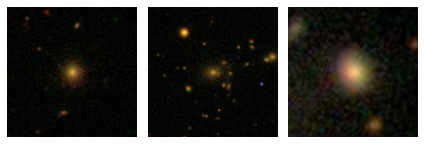

In [14]:
for num, file in enumerate(os.listdir('/content/galaxy-zoo-clean/data/train/elliptical')[0:3]):
    img = image.load_img(os.path.join('/content/galaxy-zoo-clean/data/', 'train', 'elliptical', file) , target_size=(150, 150))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

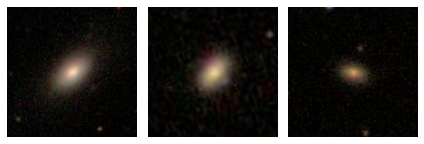

In [15]:
# lenticular class
for num, file in enumerate(os.listdir('/content/galaxy-zoo-clean/data/train/lenticular')[0:3]):
    img = image.load_img(os.path.join('/content/galaxy-zoo-clean/data/', 'train', 'lenticular', file) , target_size=(150, 150))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

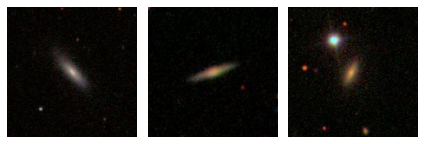

In [16]:
# spiral class
for num, file in enumerate(os.listdir('/content/galaxy-zoo-clean/data/train/spiral')[0:3]):
    img = image.load_img(os.path.join('/content/galaxy-zoo-clean/data/', 'train', 'spiral', file) , target_size=(150, 150))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))  # range for the number of epochs

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./plots-v2.png')
plt.show()

NameError: ignored

In [18]:
train_directory = '/content/galaxy-zoo-clean/data/train'
validation_directory= '/content/galaxy-zoo-clean/data/validation'

In [19]:
total_train = 0
for c in ['elliptical', 'lenticular', 'spiral']:
  total_train += len(os.listdir(os.path.join(train_directory, c)))
print('Total train:', total_train)

total_validation = 0
for c in ['elliptical', 'lenticular', 'spiral']:
  total_validation += len(os.listdir(os.path.join(validation_directory, c)))
print('Total validation:', total_validation)

Total train: 14856
Total validation: 3715


In [20]:
BS=16

In [21]:
#data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=25,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.2)
validation_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_directory,
                                                    target_size=(180,180),
                                                    batch_size=BS,
                                                    shuffle=True,
                                                    class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(validation_directory,
                                                         target_size=(180,180),
                                                         batch_size=BS,
                                                         shuffle=True,
                                                         class_mode='categorical')

Found 14856 images belonging to 3 classes.
Found 3715 images belonging to 3 classes.


In [22]:
#Net architecture

model_cnn = tf.keras.models.Sequential([
    # first convolution layer, input is an 150x150 image x3 colors
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu',input_shape=(180, 180, 3)),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu',input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second convolution layer
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # third convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # fourth convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the image pixels
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron fully connected hidden layer
    #tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [ ]:

!pip3 install autokeras

In [ ]:
import autokeras as ak

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
#from tensorflow.keras.layers.Conv2D import Conv2D

input=Input(shape=(180,180,3))
x= tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu')(input)
x=tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
b11= Input(shape=(180,180,3), name="Input_a")
b1= tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu')(x)
b1_i=tf.keras.layers.MaxPooling2D(pool_size=(2,2))(b1)
b22=Input(shape=(180,180,3), name="Input_a")
b2= tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu')(x)
b2_i=tf.keras.layers.MaxPooling2D(pool_size=(2,2))(b2)
b2=Dense(3)(b2)
x=concatenate([b1_i,b2_i])
x=tf.keras.layers.Flatten()(x)
x=Dense(3,'softmax')(x)
modell=Model(inputs=input,outputs=x)
#output_layer = Dense(3, activation = "softmax", name = "output_layer")(x)
#Model Definition 
#m = Model(inputs=[(b11,b22)],outputs=[output_layer], name = "merged model")

#a_b = concatenate([al_4,bl_2],name="concatenated_layer")

In [24]:
from tensorflow.keras import losses
LOSS= tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=0, reduction="auto", name="categorical_crossentropy")
modell.compile(loss=LOSS,
              optimizer='adam',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience=10, restore_best_weights=False)

In [25]:
EPOCHS = 20

history = modell.fit(train_generator,
                    epochs=EPOCHS,                
                    steps_per_epoch=train_generator.samples//train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator)//BS,
                    verbose=1)

Epoch 1/20
928/928 [==============================] - 160s 160ms/step - loss: 0.8495 - accuracy: 0.5321 - val_loss: 0.7021 - val_accuracy: 0.5670
Epoch 2/20
928/928 [==============================] - 146s 158ms/step - loss: 0.7119 - accuracy: 0.6075 - val_loss: 0.7368 - val_accuracy: 0.5982
Epoch 3/20
928/928 [==============================] - 146s 157ms/step - loss: 0.6732 - accuracy: 0.6232 - val_loss: 0.6141 - val_accuracy: 0.6696
Epoch 4/20
928/928 [==============================] - 146s 158ms/step - loss: 0.6548 - accuracy: 0.6386 - val_loss: 0.6296 - val_accuracy: 0.6518
Epoch 5/20
928/928 [==============================] - 148s 159ms/step - loss: 0.6445 - accuracy: 0.6451 - val_loss: 0.5985 - val_accuracy: 0.6696
Epoch 6/20
928/928 [==============================] - 147s 158ms/step - loss: 0.6350 - accuracy: 0.6480 - val_loss: 0.6306 - val_accuracy: 0.6562
Epoch 7/20
928/928 [==============================] - 144s 155ms/step - loss: 0.6258 - accuracy: 0.6566 - val_loss: 0.5930 -

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))  # range for the number of epochs

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./plots-v2.png')
plt.show()